# Project: Youtube Data Science Channel Analysis
------------------------------------------------
## Context

Driven by technology advances and ever-increasing volume of data, Data Analytics has been repidly evolving. Its applications broadly serve areas including healthcare, finance, education, transportation, retail, manufacturing and more. Data Analytics has profoundly impacted these areas as well as the ways people interact in the new era. Here's a detailed look at how Youtube Data Science channels provide their services and make their impacts in the world.

------------------------------------------------------------------------------------------------------------------------------------------------------

## Problem Statement

The dataset contains detailed information about videos from various Youtube channels specialized in data science and analytics. It includes metrics such as likes, views, and comments, and provides a robust data sample for analyzing, comparing, and predicting the performance and popularity of each channel, as well as the trend of the field.


### This project aims to find answers for the following questions

 1) The most common channels
 2) The most popular channels
 3) Average channel performances
 4) Correlations between views, likes, and comments
 5) Annual channel performances
 6) Correlation between published year and views

------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Source

Kaggle - "YouTube Dataset of all Data Science Channels"

------------------------------------------------------------------------------------------------------------------------------------------------------


## Data Dictionary

- Channel_Name: The name of the channel that published the video  
- Title: The title of the video
- Published_Date: The date when the video was published on Youtube
- Published_Year: The year when the video was published on Youtube
- Publish_Month: The month when the video was published on Youtube 
- Views: The total number of views the video has received  
- Like_Count: The total number of likes the video has received  
- Comment_Count: The total number of comments the video has received  

------------------------------------------------------------------------------------------------------------------------------------------------------


## Importing Libraries


In [209]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---------------------------------------------------------------------------------------------------------------------------
## Importing the dataset

In [212]:
#Import the data
channel_data = pd.read_csv(r'C:\youtube_datachannel.csv', encoding = 'ISO-8859-1')
channel_data

Channel_Name                                              Title  \
0      Alex The Analyst                         Truth About Big Companies    
1      Alex The Analyst                               Data Analyst Salary    
2      Alex The Analyst         Working at a Big Company Vs Small Company    
3      Alex The Analyst                               Data Analyst Resume    
4      Alex The Analyst                               Data Analyst Resume    
...                 ...                                                ...   
22976       WsCube Tech  Right Way to Find a JOB on LinkedIn (Get 20+ J...   
22977       WsCube Tech    How to Add - Use Font Awesome Icon in React JS    
22978       WsCube Tech  Learn These Programming Languages for High-Pay...   
22979       WsCube Tech            Full Stack Web Development Live Course    
22980       WsCube Tech  Data Scraping from Airbnb Website (Full Project)    

      Published_Date  Published_Year  Published_Month   Views  Like_Count  \
0         2020-01-21            2020                1  921855     19776.0   
1         2020-01-23            2020                1  130375      4659.0   
2         2020-01-25            2020                1    2922        99.0   
3         2020-01-30            2020                1   11970       204.0   
4         2020-02-06            2020                2   20627       689.0   
...              ...             ...              ...     ...         ...   
22976     2024-06-18            2024                6    4988       269.0   
22977     2024-06-18            2024                6    1508        56.0   
22978     2024-06-19            2024                6    8328       374.0   
22979     2024-06-20            2024                6    6411       248.0   
22980     2024-06-21            2024                6    1302       126.0   

       Comment_Count  
0             1053.0  
1              273.0  
2               43.0  
3              121.0  
4               83.0  
...              ...  
22976            7.0  
22977            6.0  
22978           37.0  
22979           28.0  
22980            3.0  

[22981 rows x 8 columns]

---------------------------------------------------------------------------------------------------------------------------
## Overview of the dataset

In [215]:
#Have a glimpse of the data
channel_data.head()

Channel_Name                                       Title  \
0  Alex The Analyst                  Truth About Big Companies    
1  Alex The Analyst                        Data Analyst Salary    
2  Alex The Analyst  Working at a Big Company Vs Small Company    
3  Alex The Analyst                        Data Analyst Resume    
4  Alex The Analyst                        Data Analyst Resume    

  Published_Date  Published_Year  Published_Month   Views  Like_Count  \
0     2020-01-21            2020                1  921855     19776.0   
1     2020-01-23            2020                1  130375      4659.0   
2     2020-01-25            2020                1    2922        99.0   
3     2020-01-30            2020                1   11970       204.0   
4     2020-02-06            2020                2   20627       689.0   

   Comment_Count  
0         1053.0  
1          273.0  
2           43.0  
3          121.0  
4           83.0

In [217]:
#Check info of the data
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22981 entries, 0 to 22980
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Channel_Name     22981 non-null  object 
 1   Title            22981 non-null  object 
 2   Published_Date   22981 non-null  object 
 3   Published_Year   22981 non-null  int64  
 4   Published_Month  22981 non-null  int64  
 5   Views            22981 non-null  int64  
 6   Like_Count       22947 non-null  float64
 7   Comment_Count    22956 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ MB


-------------------------------------------------------------------------
### Observations:
- The dataset has 7 columns and 22981 rows
- Column "Like_Count", and "Comment_Count" have missing values  

In [220]:
(channel_data.isnull().sum()/channel_data.shape[0]*100)['Like_Count']

0.1479483051216222

In [222]:
(channel_data.isnull().sum()/channel_data.shape[0]*100)['Comment_Count']

0.10878551847178103

-------------------------------------------------------------------------
### Observations update:
- Column "Like_Count" has 0.15% missing values. 
- Column "Comment_Count" has 0.11% missing values. 

## Question #1: The most common channels

In [226]:
Title_count = pd.DataFrame(channel_data.groupby('Channel_Name').Title.nunique()).sort_values('Title', ascending = True)

In [228]:
Title_count

Title
Channel_Name                      
Dataquest                       49
Thu Vu data analytics           87
Rishabh Mishra                  87
Keith Galli                     88
techTFQ                        131
Darshil Parmar                 150
Ryan Nolan Data                157
Rob Mulla                      157
Luke Barousse                  158
Tina Huang                     219
StatQuest with Josh Starmer    275
Alex The Analyst               277
Ken Jee                        287
Nicholas Renotte               302
Kaggle                         375
DeepLearningAI                 435
Ch-oo                          479
Tableau Tim                    507
Leila Gharani                  584
Socratica                      660
Kevin Stratvert                844
codebasics                     848
CampusX                        990
Guy in a Cube                 1037
sentdex                       1251
freeCodeCamp.org              1671
Krish Naik                    1813
ExcelIsFun                    3692
WsCube Tech                   5026

<Axes: title={'center': 'Videos Per Channel in %'}, ylabel='Title'>

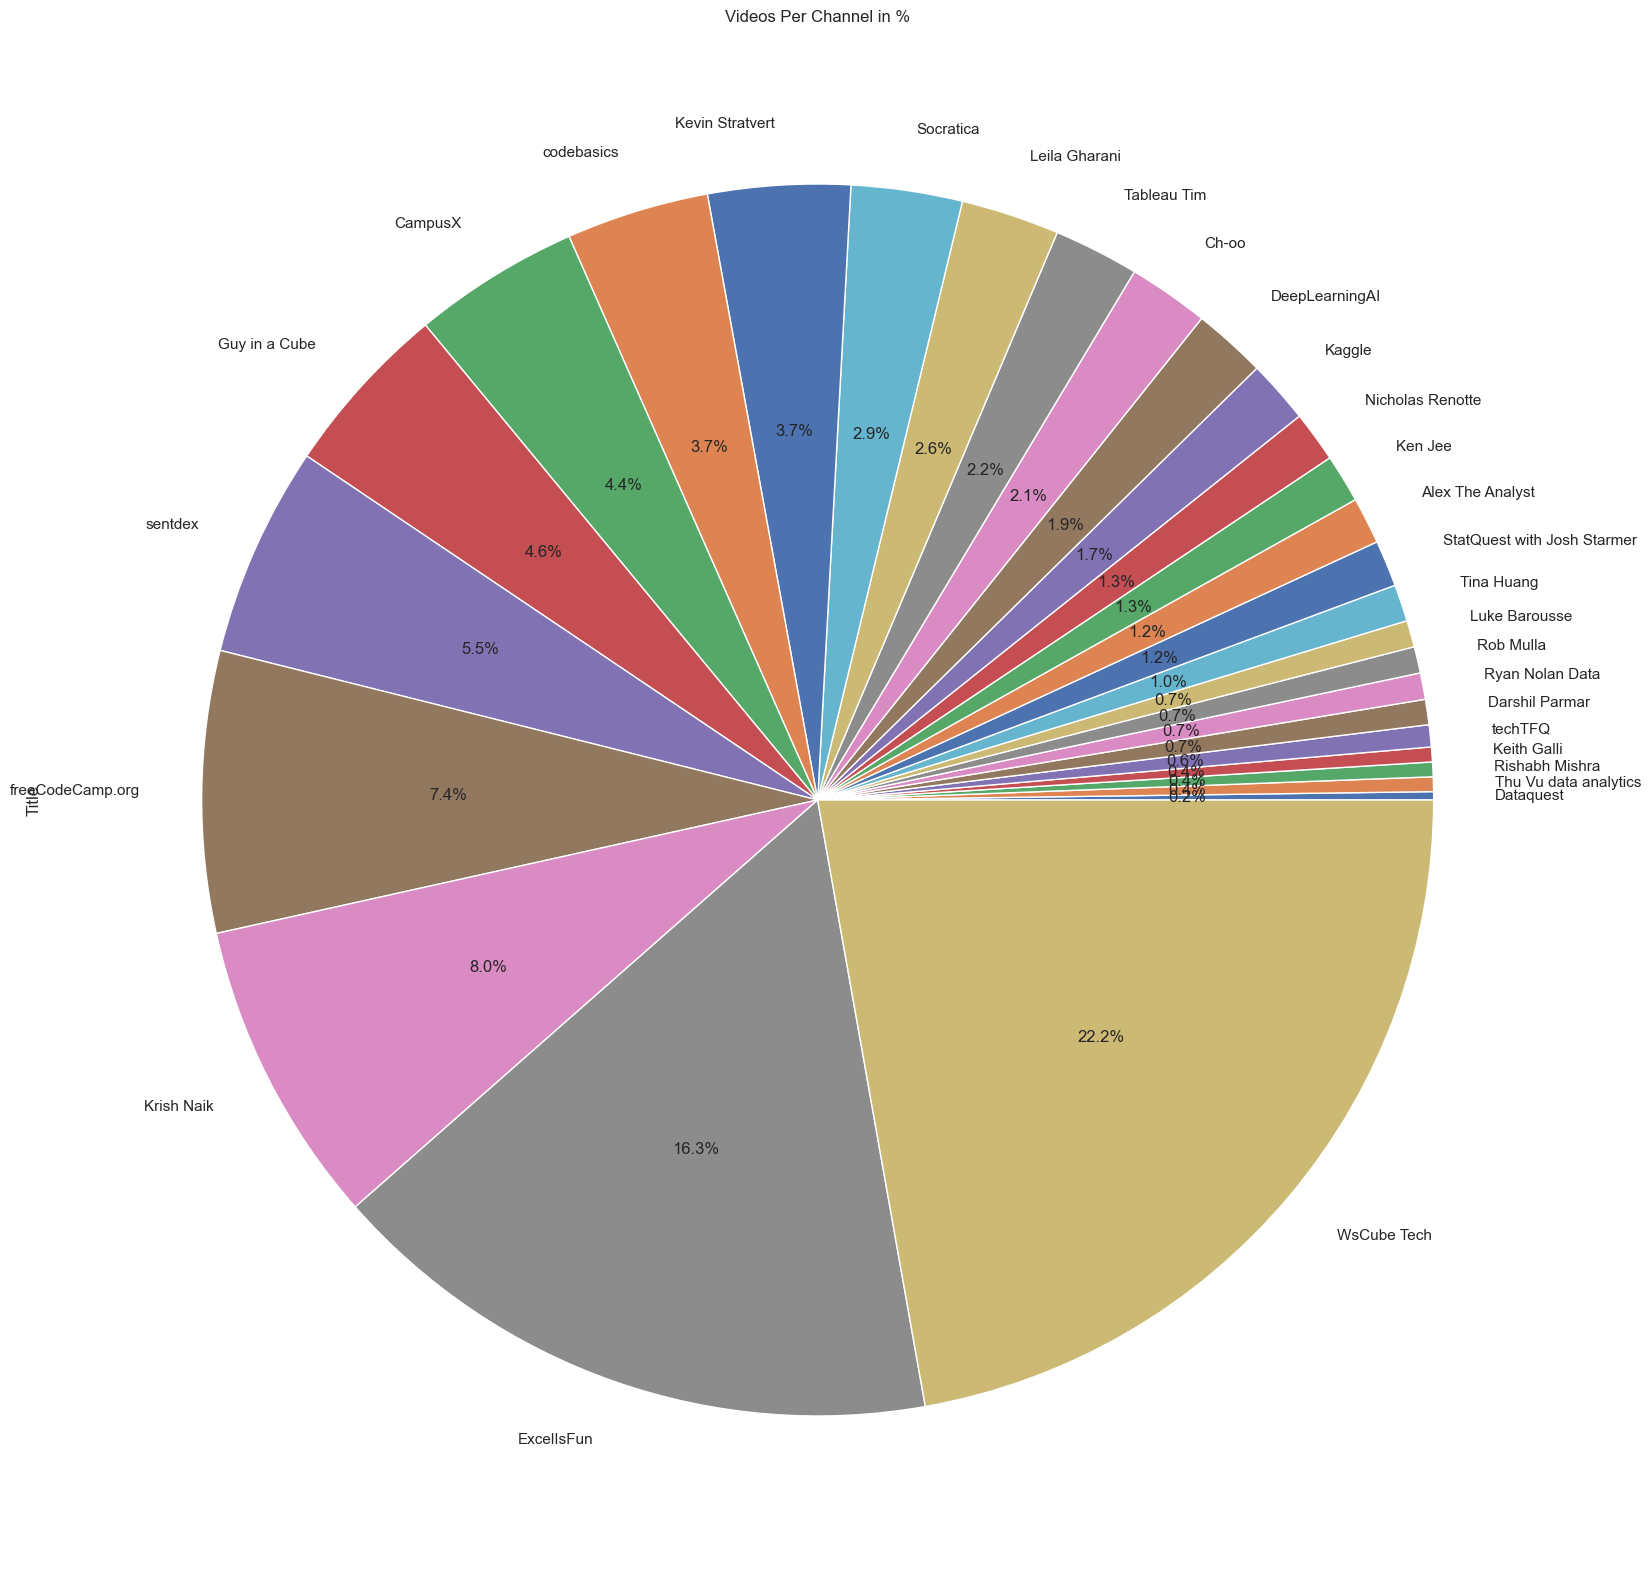

In [230]:
Title_count['Title'].plot.pie(title='Videos Per Channel in %', autopct = '%1.1f%%', figsize = (20,20))

<Axes: title={'center': 'Videos Per Channel'}, ylabel='Channel_Name'>

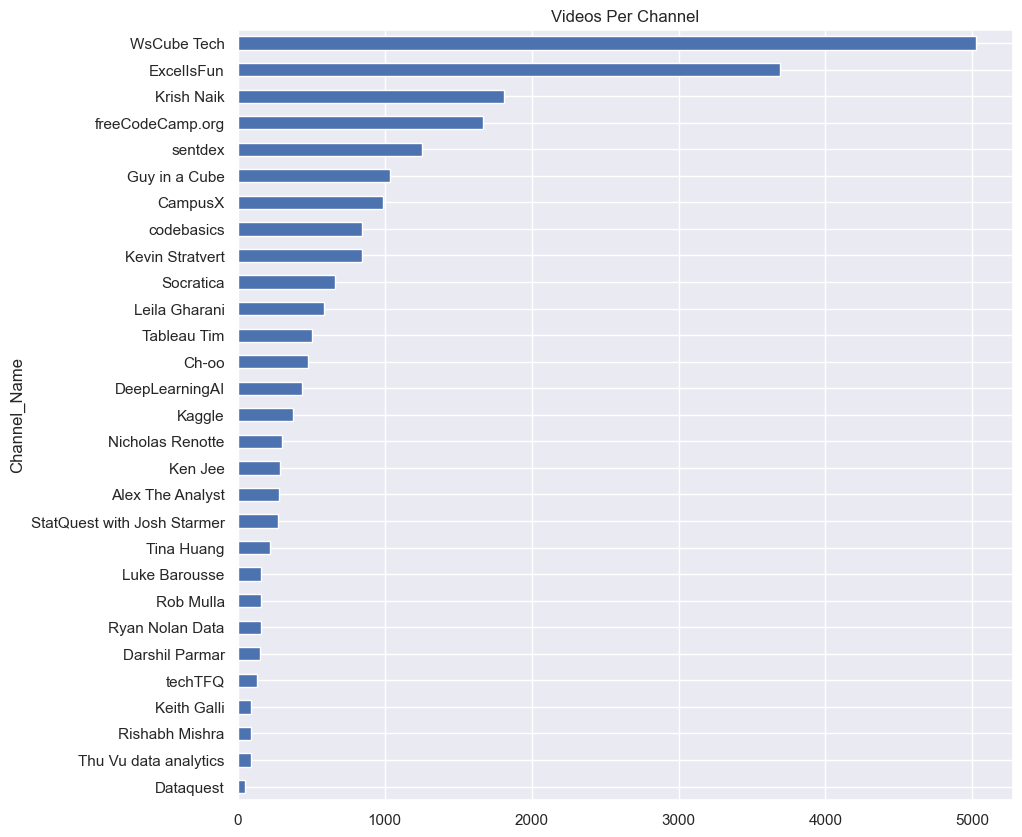

In [232]:
Title_count['Title'].plot.barh(title = 'Videos Per Channel', figsize = (10, 10))

## Question #2: The most popular channels

In [235]:
channel_data_1 = channel_data[['Channel_Name', 'Views', 'Like_Count', 'Comment_Count']]

In [237]:
channel_data_1

Channel_Name   Views  Like_Count  Comment_Count
0      Alex The Analyst  921855     19776.0         1053.0
1      Alex The Analyst  130375      4659.0          273.0
2      Alex The Analyst    2922        99.0           43.0
3      Alex The Analyst   11970       204.0          121.0
4      Alex The Analyst   20627       689.0           83.0
...                 ...     ...         ...            ...
22976       WsCube Tech    4988       269.0            7.0
22977       WsCube Tech    1508        56.0            6.0
22978       WsCube Tech    8328       374.0           37.0
22979       WsCube Tech    6411       248.0           28.0
22980       WsCube Tech    1302       126.0            3.0

[22981 rows x 4 columns]

In [239]:
from pandas import Series, DataFrame

In [241]:
channel_avg = channel_data_1.groupby('Channel_Name').mean()

In [243]:
channel_avg

Views   Like_Count  Comment_Count
Channel_Name                                                          
Alex The Analyst              98776.586885  2727.623616     154.291803
CampusX                       35183.070409   948.475737      52.485252
Ch-oo                         90257.409186  2090.269311      88.123173
Darshil Parmar                47142.394737  1270.039474      86.513158
Dataquest                     18256.680000   427.940000      35.140000
DeepLearningAI                41795.521839   554.977011      18.605991
ExcelIsFun                    41315.737966   287.736885      40.493207
Guy in a Cube                 34538.153032   581.335900      41.933462
Kaggle                        10568.000000   187.736842       7.213158
Keith Galli                  151293.617978  3497.044944     159.078652
Ken Jee                       38389.132404  1197.216028     102.829268
Kevin Stratvert              492367.963869  9265.700466     382.570595
Krish Naik                    53893.290305  1277.271786      71.088877
Leila Gharani                434421.869863  9839.993151     362.099315
Luke Barousse                142304.113208  4754.823899     191.289308
Nicholas Renotte              57902.555195  1765.805195     130.422078
Rishabh Mishra               189176.647727  5943.147727     353.829545
Rob Mulla                     69838.082803  2835.662420      79.216561
Ryan Nolan Data                6838.280255   226.471338      12.331210
Socratica                     89478.475758  1823.368182      80.230303
StatQuest with Josh Starmer  236543.856631  5136.878136     337.422939
Tableau Tim                    7911.919450   117.815324      11.284872
Thu Vu data analytics         91041.402299  3831.517241     110.896552
Tina Huang                   141489.040541  6346.594595     214.855856
WsCube Tech                   56595.703890  1408.663248      40.592528
codebasics                   102263.629966  2162.783201      93.266742
freeCodeCamp.org             434828.175627  9625.603345     298.191756
sentdex                       91351.216108  1085.838118     108.096491
techTFQ                      123595.007353  3183.963235     175.176471

In [245]:
channel_avg.sort_values('Views', ascending = True, inplace = True)

<Axes: title={'center': 'Average Views by Channel'}, ylabel='Channel_Name'>

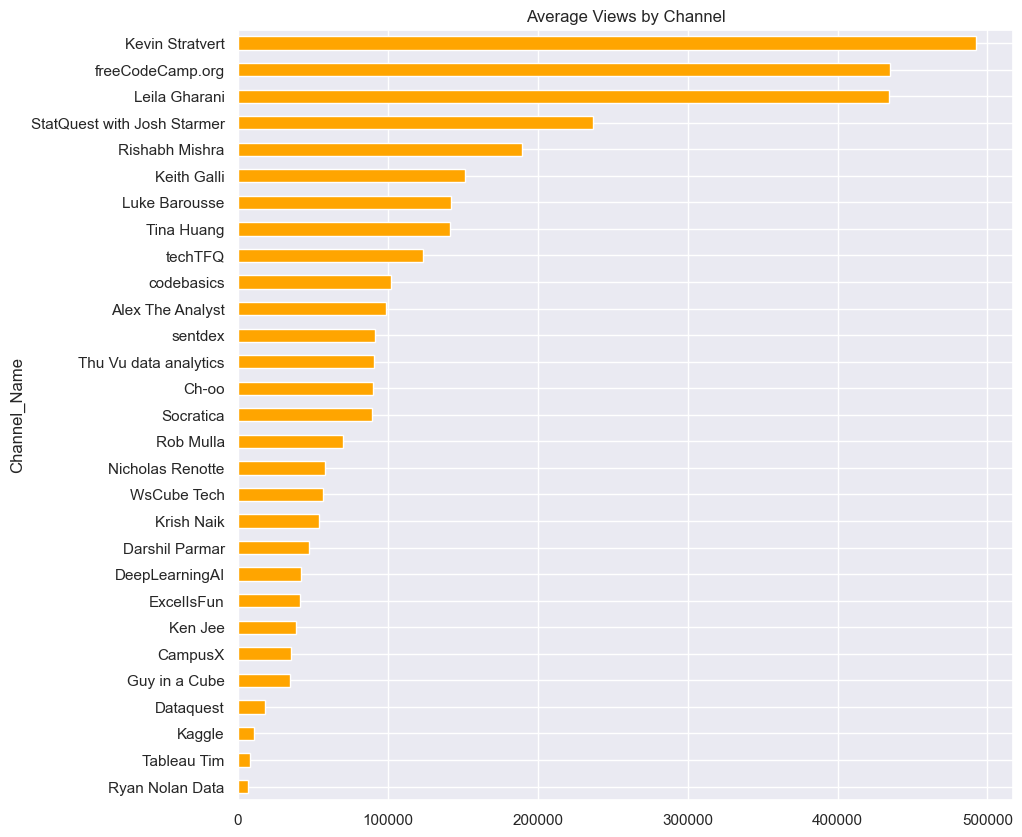

In [247]:
channel_avg['Views'].plot.barh(title = 'Average Views by Channel', color = ('orange'), figsize = (10, 10))

## Question #3: Average channel performances

In [250]:
channel_avg.sort_values('Views', ascending = True, inplace = True)

<Axes: title={'center': 'Average Views and Likes by Channel'}, ylabel='Channel_Name'>

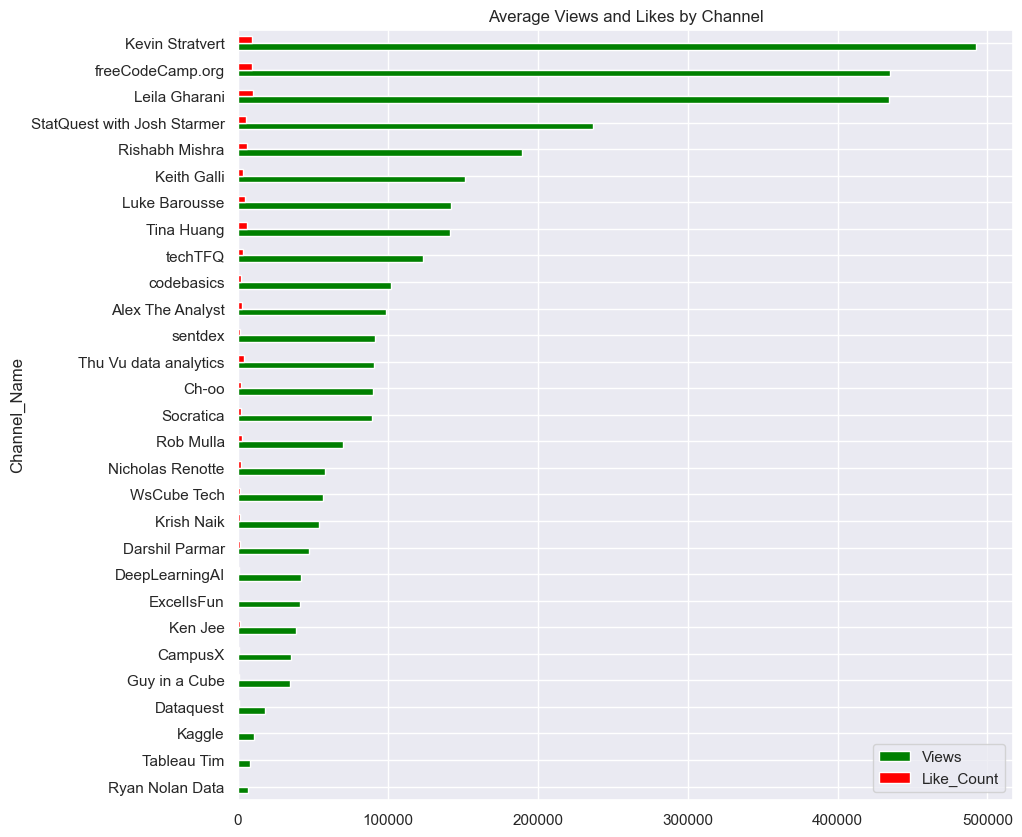

In [252]:
channel_avg[['Views', 'Like_Count']].plot.barh(title = 'Average Views and Likes by Channel', color = ('Green', 'red'), figsize = (10, 10))

In [254]:
channel_avg.sort_values('Like_Count', ascending = True, inplace = True)

<Axes: title={'center': 'Average Likes and Comments by Channel'}, ylabel='Channel_Name'>

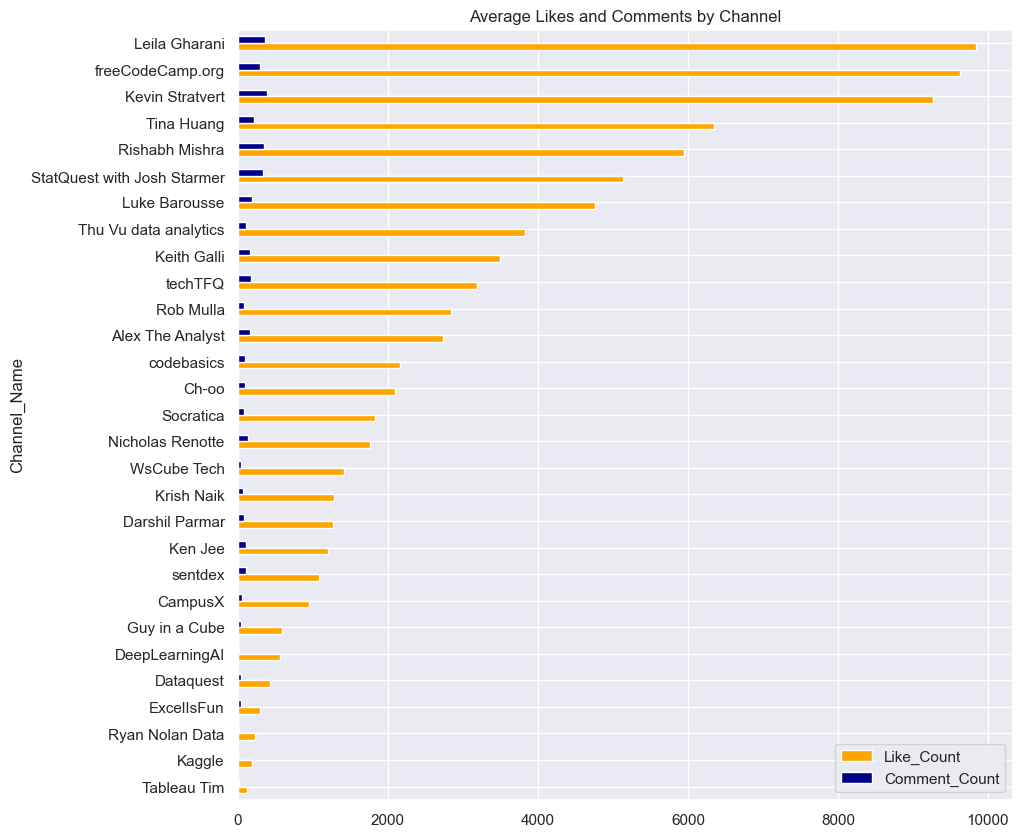

In [256]:
channel_avg[['Like_Count','Comment_Count']].plot.barh(title = 'Average Likes and Comments by Channel', color = ('Orange','DarkBlue'), figsize = (10, 10))

## Question #4: Correlations between Views, Likes, and Comments

In [259]:
channel_counted = channel_avg[channel_avg['Views'] >= 1]

channel_counted.corr(method = 'spearman')

Views  Like_Count  Comment_Count
Views          1.000000    0.942857       0.929557
Like_Count     0.942857    1.000000       0.923153
Comment_Count  0.929557    0.923153       1.000000

<Axes: xlabel='Views', ylabel='Like_Count'>

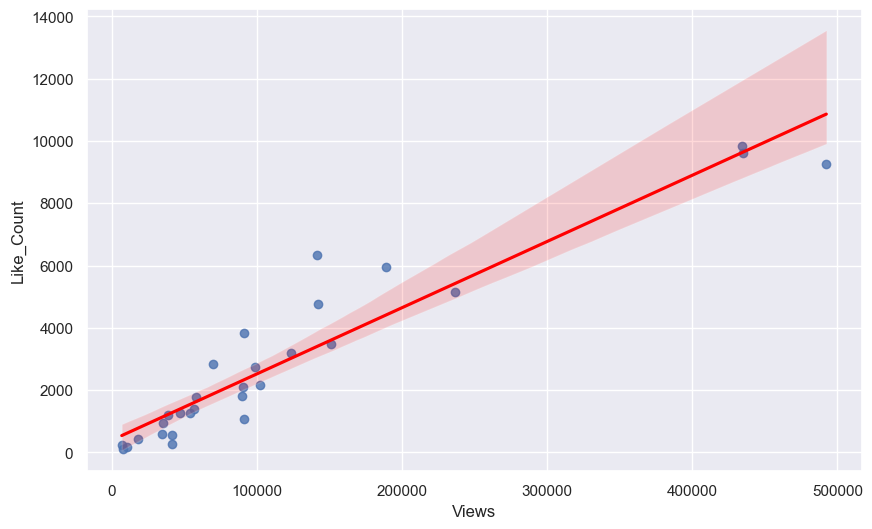

In [261]:
sns.regplot(x = 'Views', y = 'Like_Count', data = channel_counted, line_kws = {'color': 'Red'})

<Axes: xlabel='Views', ylabel='Comment_Count'>

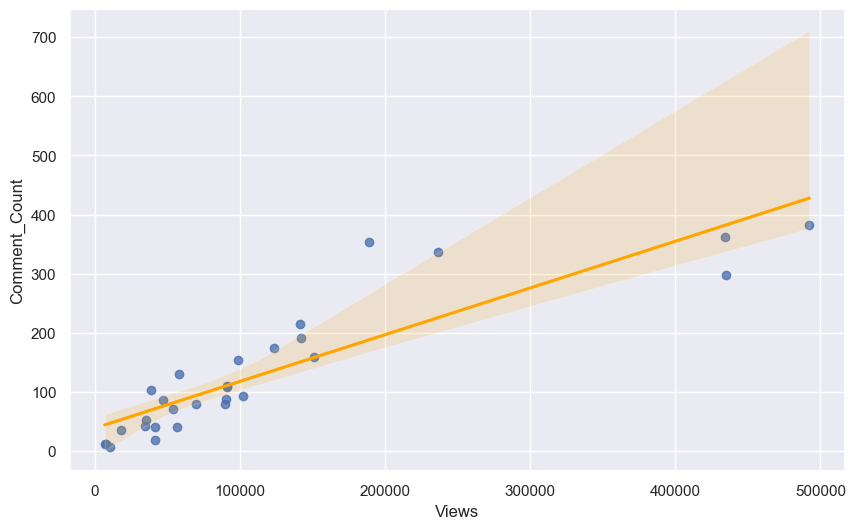

In [263]:
sns.regplot(x = 'Views', y = 'Comment_Count', data = channel_counted, line_kws = {'color': 'Orange'})

<Axes: xlabel='Like_Count', ylabel='Comment_Count'>

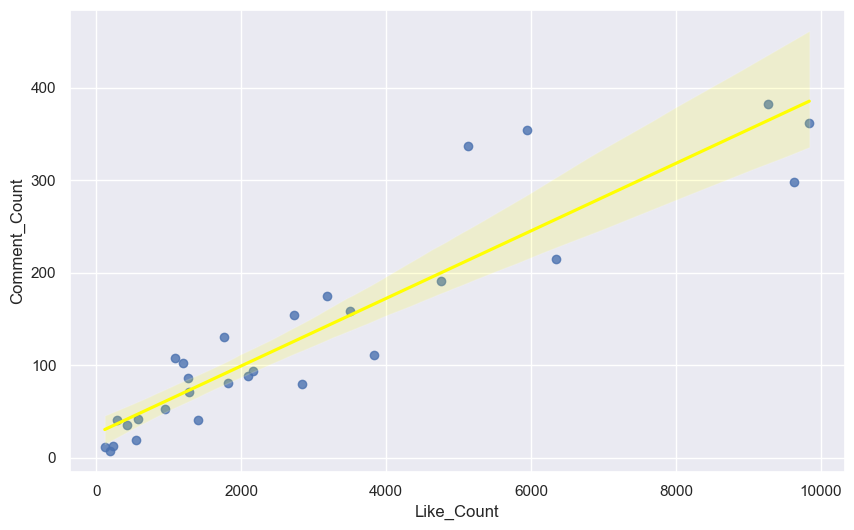

In [265]:
sns.regplot(x = 'Like_Count', y = 'Comment_Count', data = channel_counted, line_kws = {'color': 'Yellow'})

## Question #5: Annual channel performances

In [268]:
channel_data

Channel_Name                                              Title  \
0      Alex The Analyst                         Truth About Big Companies    
1      Alex The Analyst                               Data Analyst Salary    
2      Alex The Analyst         Working at a Big Company Vs Small Company    
3      Alex The Analyst                               Data Analyst Resume    
4      Alex The Analyst                               Data Analyst Resume    
...                 ...                                                ...   
22976       WsCube Tech  Right Way to Find a JOB on LinkedIn (Get 20+ J...   
22977       WsCube Tech    How to Add - Use Font Awesome Icon in React JS    
22978       WsCube Tech  Learn These Programming Languages for High-Pay...   
22979       WsCube Tech            Full Stack Web Development Live Course    
22980       WsCube Tech  Data Scraping from Airbnb Website (Full Project)    

      Published_Date  Published_Year  Published_Month   Views  Like_Count  \
0         2020-01-21            2020                1  921855     19776.0   
1         2020-01-23            2020                1  130375      4659.0   
2         2020-01-25            2020                1    2922        99.0   
3         2020-01-30            2020                1   11970       204.0   
4         2020-02-06            2020                2   20627       689.0   
...              ...             ...              ...     ...         ...   
22976     2024-06-18            2024                6    4988       269.0   
22977     2024-06-18            2024                6    1508        56.0   
22978     2024-06-19            2024                6    8328       374.0   
22979     2024-06-20            2024                6    6411       248.0   
22980     2024-06-21            2024                6    1302       126.0   

       Comment_Count  
0             1053.0  
1              273.0  
2               43.0  
3              121.0  
4               83.0  
...              ...  
22976            7.0  
22977            6.0  
22978           37.0  
22979           28.0  
22980            3.0  

[22981 rows x 8 columns]

In [270]:
channel_data_2 = channel_data[['Channel_Name', 'Published_Year', 'Views', 'Like_Count', 'Comment_Count']]

In [272]:
channel_data_2

Channel_Name  Published_Year   Views  Like_Count  Comment_Count
0      Alex The Analyst            2020  921855     19776.0         1053.0
1      Alex The Analyst            2020  130375      4659.0          273.0
2      Alex The Analyst            2020    2922        99.0           43.0
3      Alex The Analyst            2020   11970       204.0          121.0
4      Alex The Analyst            2020   20627       689.0           83.0
...                 ...             ...     ...         ...            ...
22976       WsCube Tech            2024    4988       269.0            7.0
22977       WsCube Tech            2024    1508        56.0            6.0
22978       WsCube Tech            2024    8328       374.0           37.0
22979       WsCube Tech            2024    6411       248.0           28.0
22980       WsCube Tech            2024    1302       126.0            3.0

[22981 rows x 5 columns]

In [274]:
channel_data_2.groupby(['Published_Year', 'Channel_Name'])['Views'].mean()

Published_Year  Channel_Name    
2008            ExcelIsFun           55509.166667
2009            Ch-oo                52303.300000
                ExcelIsFun           42558.844371
2010            Ch-oo                30948.714286
                ExcelIsFun           40256.240860
                                        ...      
2024            WsCube Tech          30629.478448
                codebasics          147172.157895
                freeCodeCamp.org     98678.750000
                sentdex               2638.000000
                techTFQ              15055.916667
Name: Views, Length: 234, dtype: float64

In [276]:
time_channel = pd.DataFrame(channel_data_2.groupby(['Published_Year', 'Channel_Name'])['Views'].mean())

In [278]:
time_channel

Views
Published_Year Channel_Name                   
2008           ExcelIsFun         55509.166667
2009           Ch-oo              52303.300000
               ExcelIsFun         42558.844371
2010           Ch-oo              30948.714286
               ExcelIsFun         40256.240860
...                                        ...
2024           WsCube Tech        30629.478448
               codebasics        147172.157895
               freeCodeCamp.org   98678.750000
               sentdex             2638.000000
               techTFQ            15055.916667

[234 rows x 1 columns]

In [280]:
final_channel = pd.pivot_table(time_channel, values = 'Views', index = ['Channel_Name'], columns = ['Published_Year'])

In [282]:
final_channel

Published_Year                       2008          2009          2010  \
Channel_Name                                                            
Alex The Analyst                      NaN           NaN           NaN   
CampusX                               NaN           NaN           NaN   
Ch-oo                                 NaN  52303.300000  30948.714286   
Darshil Parmar                        NaN           NaN           NaN   
Dataquest                             NaN           NaN           NaN   
DeepLearningAI                        NaN           NaN           NaN   
ExcelIsFun                   55509.166667  42558.844371  40256.240860   
Guy in a Cube                         NaN           NaN           NaN   
Kaggle                                NaN           NaN           NaN   
Keith Galli                           NaN           NaN           NaN   
Ken Jee                               NaN           NaN           NaN   
Kevin Stratvert                       NaN           NaN           NaN   
Krish Naik                            NaN           NaN           NaN   
Leila Gharani                         NaN           NaN           NaN   
Luke Barousse                         NaN           NaN           NaN   
Nicholas Renotte                      NaN           NaN           NaN   
Rishabh Mishra                        NaN           NaN           NaN   
Rob Mulla                             NaN           NaN           NaN   
Ryan Nolan Data                       NaN           NaN           NaN   
Socratica                             NaN           NaN           NaN   
StatQuest with Josh Starmer           NaN           NaN           NaN   
Tableau Tim                           NaN           NaN  32836.000000   
Thu Vu data analytics                 NaN           NaN           NaN   
Tina Huang                            NaN           NaN           NaN   
WsCube Tech                           NaN           NaN           NaN   
codebasics                            NaN           NaN           NaN   
freeCodeCamp.org                      NaN           NaN           NaN   
sentdex                               NaN           NaN           NaN   
techTFQ                               NaN           NaN           NaN   

Published_Year                       2011          2012          2013  \
Channel_Name                                                            
Alex The Analyst                      NaN           NaN           NaN   
CampusX                               NaN           NaN           NaN   
Ch-oo                        47495.500000  84180.000000   9589.071429   
Darshil Parmar                        NaN           NaN           NaN   
Dataquest                             NaN           NaN           NaN   
DeepLearningAI                        NaN           NaN           NaN   
ExcelIsFun                   41847.720721  70869.289474  46934.904930   
Guy in a Cube                         NaN           NaN           NaN   
Kaggle                                NaN           NaN           NaN   
Keith Galli                           NaN           NaN           NaN   
Ken Jee                               NaN           NaN           NaN   
Kevin Stratvert                       NaN           NaN           NaN   
Krish Naik                            NaN           NaN           NaN   
Leila Gharani                         NaN           NaN           NaN   
Luke Barousse                         NaN           NaN           NaN   
Nicholas Renotte                      NaN           NaN           NaN   
Rishabh Mishra                        NaN           NaN           NaN   
Rob Mulla                             NaN           NaN           NaN   
Ryan Nolan Data                       NaN           NaN           NaN   
Socratica                             NaN  18583.795833  45585.964912   
StatQuest with Josh Starmer           NaN           NaN           NaN   
Tableau Tim                           NaN           NaN  

Text(0.5, 1.0, 'Channels by Views Per Year')

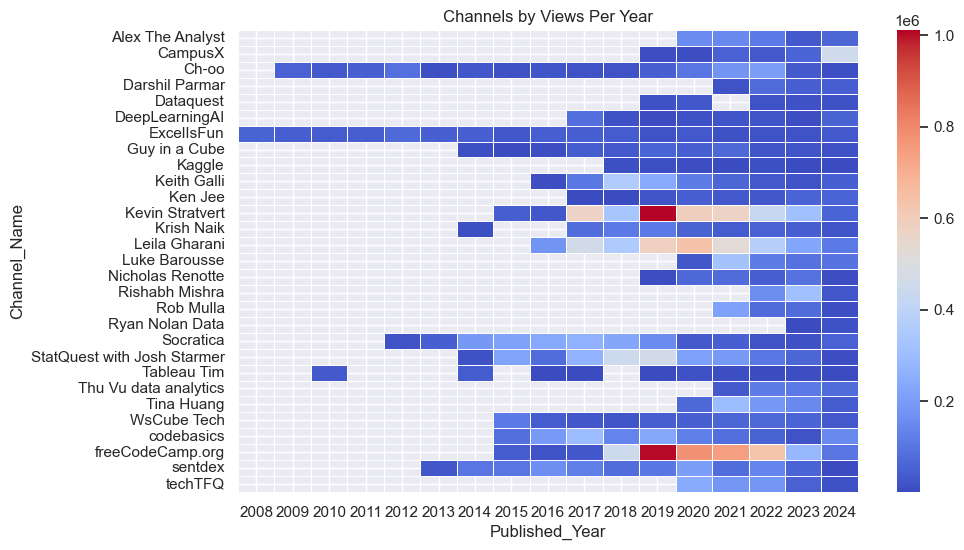

In [284]:
sns.set(rc = {'figure.figsize':(10, 6)})
sns.heatmap(final_channel, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Channels by Views Per Year')

## Question #6: Correlation between published year and views

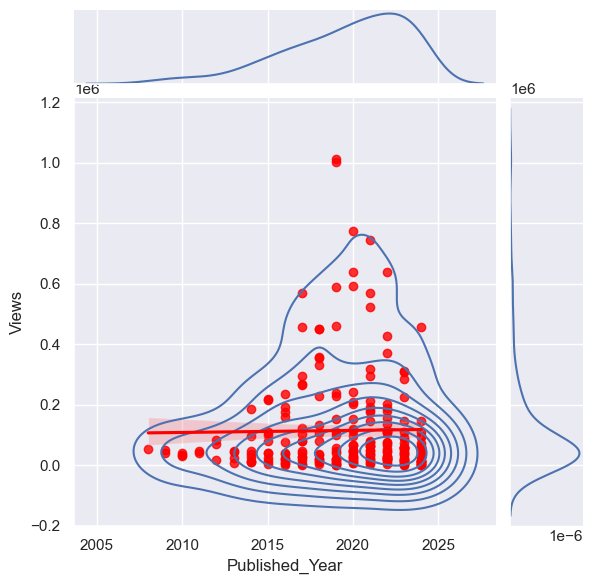

In [287]:
year_view_corr = sns.jointplot(data = time_channel, x = 'Published_Year', y = 'Views', kind = "kde")
year_view_corr.plot_joint(sns.regplot, color = 'red')

## Findings:

##### 1) Overall speaking, the numbers of Likes and Comments are proportional to the number of Views.
##### 2) The most common channels are not necessarily the most popular ones. 
##### 3) The most popular channels are usually having more interactions from audience.
##### 4) The time period of the highest views of the channels during the past 16 years was between 2019 and 2021. 